<a href="https://colab.research.google.com/github/kimjunyeop1/project1/blob/main/202200932_%EA%B9%80%EC%A4%80%EC%97%BD_12_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar10 


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

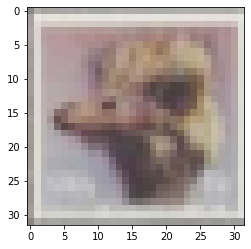

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[820])
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import numpy as np
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3).astype('float32') / 255
y_train = to_categorical(y_train)   
y_test = to_categorical(y_test)

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
trans_model = ResNet50(include_top=False,  
                 weights="imagenet",
                 input_shape=(32,32,3),  
                 classes=1000)

In [ ]:
trans_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [ ]:
trans_model.trainable = False


from tensorflow.keras.layers import Flatten, Dropout

model= Sequential()

model.add(trans_model)
model.add(Flatten())

model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.15))

model.add(Dense(10,activation='softmax'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               262272    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 23,851,274
Trainable params: 263,562
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
model.fit(x_train, y_train, epochs=3, batch_size=200, verbose=1)

Epoch 1/3
250/250 [==============================] - 128s 499ms/step - loss: 2.2105 - accuracy: 0.1857
Epoch 2/3
250/250 [==============================] - 122s 489ms/step - loss: 2.0406 - accuracy: 0.2495
Epoch 3/3
250/250 [==============================] - 126s 503ms/step - loss: 1.9762 - accuracy: 0.2764
